In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,plot_importance
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib
import platform

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=250702, max_depth=5),
    "Random Forest": RandomForestRegressor(random_state=250702),
    "XGBoost": XGBRegressor(random_state=250702)
}


In [3]:
df = pd.read_csv("final.csv",encoding='cp949')

In [4]:
df.columns

Index(['연도', '노지온주(조생)', 'Tem_mean_enlarge', 'Wspeed_mean_enlarge',
       'Humid_mean_enlarge', 'Sunshine_mean_enlarge', 'Tem_mean_bulk',
       'Wspeed_mean_bulk', 'Humid_mean_bulk', 'Sunshine_mean_bulk'],
      dtype='object')

In [5]:
df

,연도,노지온주(조생),Tem_mean_enlarge,Wspeed_mean_enlarge,Humid_mean_enlarge,Sunshine_mean_enlarge,Tem_mean_bulk,Wspeed_mean_bulk,Humid_mean_bulk,Sunshine_mean_bulk
0,2015,21041.733333,15.003333,2.373333,75.223333,5.470000,22.645652,2.211957,72.175000,7.372826
1,2016,16911.266667,15.796667,1.816667,75.430000,6.020000,23.957609,1.879348,80.275000,5.506522
2,2017,16305.866667,15.696667,1.760000,70.886667,6.033333,24.104348,2.066304,78.377174,6.232609
3,2018,16972.400000,15.973333,1.643333,77.046667,6.310000,23.056522,2.018478,81.836957,6.556522
4,2019,20525.466667,14.956667,1.690000,75.356667,6.686667,23.757609,1.989130,87.235870,6.398913
5,2020,20260.066667,13.823333,1.686667,64.720000,8.843333,22.643478,1.876087,80.552174,6.270236
6,2021,20087.533333,15.983333,2.043333,67.930000,7.663333,23.625000,1.896739,82.252174,6.280435


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

target = '노지온주(조생)'
features = ['Tem_mean_enlarge','Tem_mean_bulk']

X = df[features]
y = df[target]

# 랜덤 분할 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    results.append({
        "모델": name,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R2 Score": round(r2, 4),
        "MAPE": round(mape, 2)
    })

result_df = pd.DataFrame(results)
print(result_df)


                  모델     RMSE      MAE  R2 Score  MAPE
0  Linear Regression  1678.75  1650.64    0.3393  8.63
1      Decision Tree   699.11   693.53    0.8854  3.65
2      Random Forest  1172.32   982.79    0.6778  4.87
3            XGBoost  1312.38  1292.50    0.5962  6.76


C:\Users\hansung\AppData\Local\Temp\ipykernel_7824\2543646997.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')


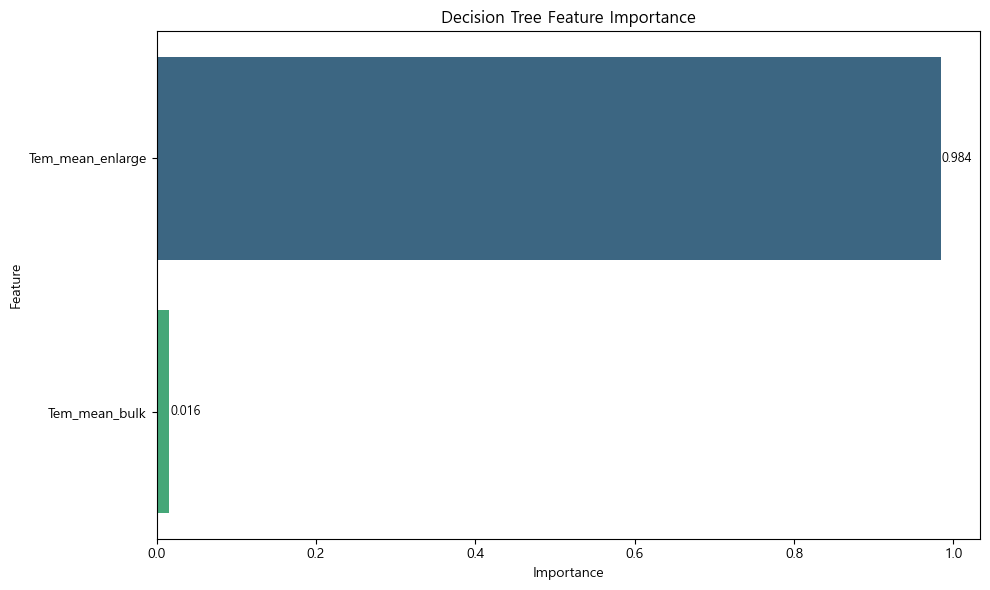

,Feature,Importance
0,Tem_mean_enlarge,0.984234
1,Tem_mean_bulk,0.015766


In [7]:
target_model = models['Decision Tree']

importances = target_model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title("Decision Tree Feature Importance")

# 각 막대 위에 값 표시
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.001, p.get_y() + p.get_height()/2, f'{width:.3f}',
            va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

fi_df  # 변수 중요도 데이터프레임 출력

C:\Users\hansung\AppData\Local\Temp\ipykernel_7824\3702834481.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')


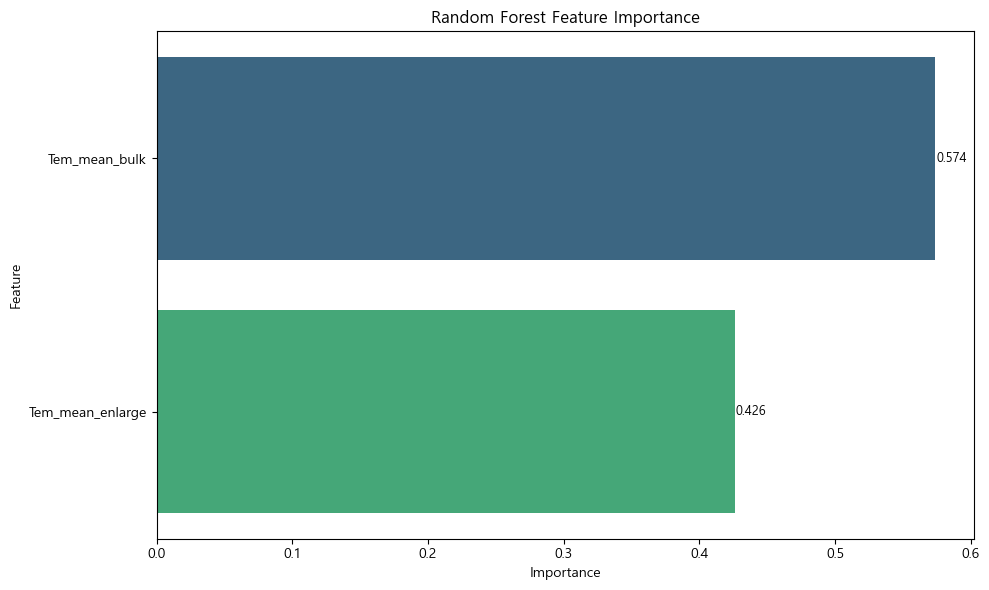

,Feature,Importance
1,Tem_mean_bulk,0.574036
0,Tem_mean_enlarge,0.425964


In [ ]:
target_model = models['Random Forest'] 

importances = target_model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Feature Importance")

# 각 막대 위에 값 표시
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.001, p.get_y() + p.get_height()/2, f'{width:.3f}',
            va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

fi_df

C:\Users\hansung\AppData\Local\Temp\ipykernel_7824\1517169688.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')


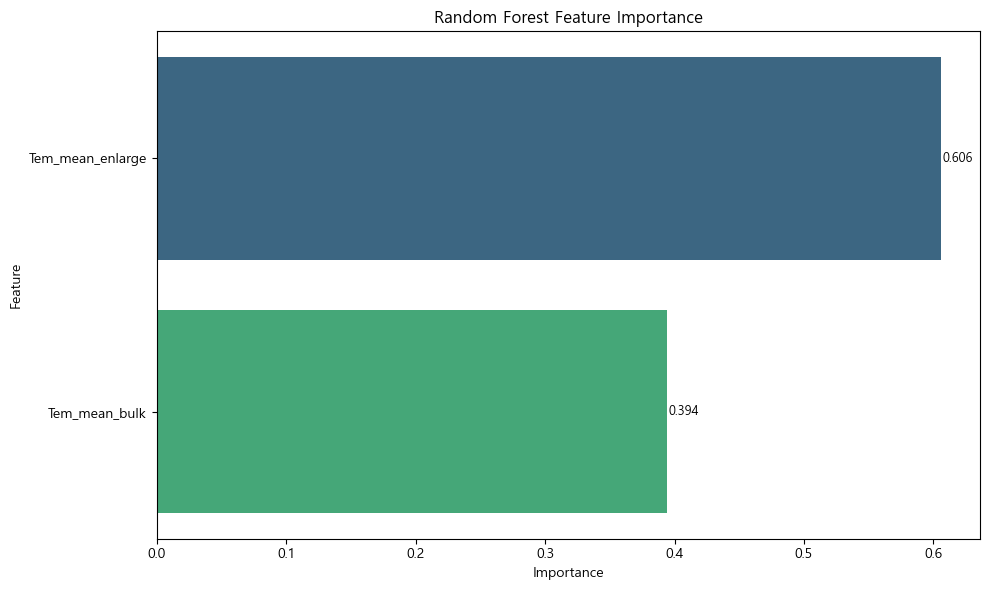

,Feature,Importance
0,Tem_mean_enlarge,0.60568
1,Tem_mean_bulk,0.39432


In [9]:
target_model = models['XGBoost'] 

importances = target_model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title("Random Forest Feature Importance")

# 각 막대 위에 값 표시
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.001, p.get_y() + p.get_height()/2, f'{width:.3f}',
            va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

fi_df  # 변수 중요도 데이터프레임 출력